In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_excel(r"Data_Train.xlsx")

In [5]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
30h 15m      1
27h 55m      1
27h 30m      1
36h 25m      1
37h 10m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train.shape

(10683, 11)

In [10]:
train.dropna(inplace=True)

# EDA

In [15]:
train['journey_day']=pd.to_datetime(train.Date_of_Journey,format='%d/%m/%Y').dt.day

In [16]:
train['journey_month']=pd.to_datetime(train.Date_of_Journey,format='%d/%m/%Y').dt.month

In [17]:
train.drop('Date_of_Journey',axis=1,inplace=True)

In [20]:
# Extracting Hours
train["dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour

# Extracting Minutes
train["dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train.drop(["Dep_Time"], axis = 1, inplace = True)

In [22]:
# Extracting Hours
train["Arrival_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour

# Extracting Minutes
train["Arrival_min"] = pd.to_datetime(train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [29]:
# Assigning and converting Duration column into list
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [30]:
train['duration_hour']=duration_hours
train['duration_min']=duration_mins

In [32]:
train.drop('Duration',axis=1,inplace=True)

# Handling Categorical Data

In [33]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [34]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

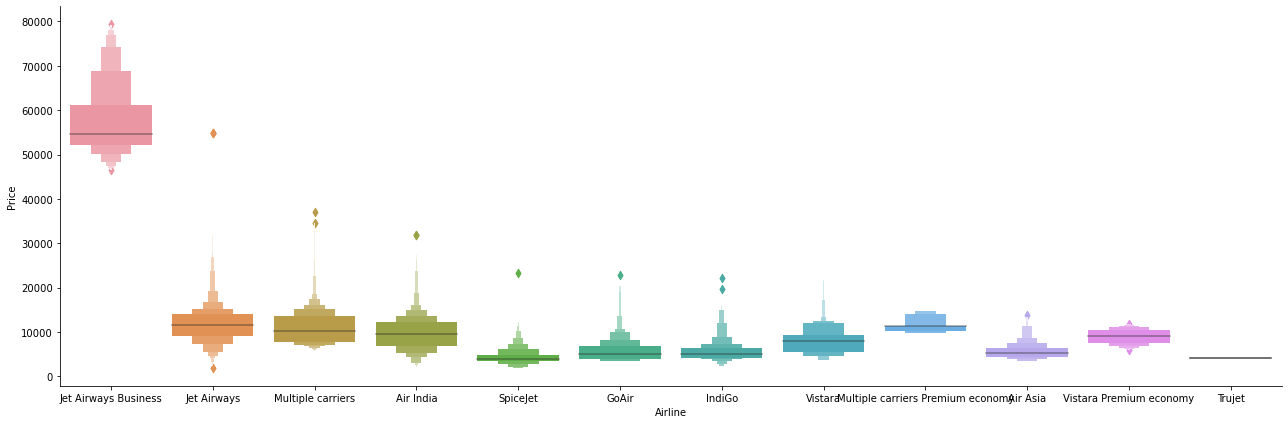

In [35]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [41]:
airlines=train[['Airline']]
airlines=pd.get_dummies(airlines,drop_first=True)
airlines.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [42]:
train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

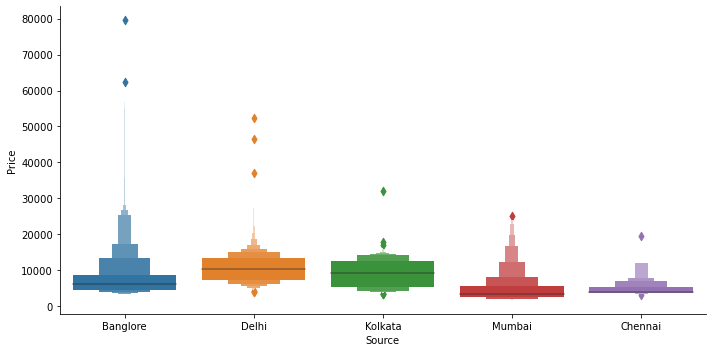

In [48]:
sns.catplot(x='Source',y='Price',data=train.sort_values(by='Price',ascending=False),kind='boxen',aspect=2,height=5);

In [49]:
source = train[["Source"]]
source = pd.get_dummies(source, drop_first= True)

In [51]:
train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [52]:
destination = train[["Destination"]]

destination = pd.get_dummies(destination, drop_first = True)

destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [54]:
#dropping route and additional info
train.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [56]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [59]:
train.replace({'non-stop':0,
               '1 stop':1,
               '2 stops':2,
               '3 stops':3,
               '4 stops':4},inplace=True)

In [61]:
train=pd.concat([train,airlines,source,destination],axis=1)
train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [62]:
train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [63]:
train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [64]:
# test data
test= pd.read_excel(r"Test_set.xlsx")

In [65]:
print("Test data Info")
print("-"*75)
print(test.info())

print()
print()

print("Null values :")
print("-"*75)
test.dropna(inplace = True)
print(test.isnull().sum())

# EDA

# Date_of_Journey
test["journey_day"] = pd.to_datetime(test.Date_of_Journey, format="%d/%m/%Y").dt.day
test["journey_month"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test["dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute
test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test["duration_hour"] = duration_hours
test["duration_min"] = duration_mins
test.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test["Airline"].value_counts())
Airline = pd.get_dummies(test["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test["Source"].value_counts())
Source = pd.get_dummies(test["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test["Destination"].value_counts())
Destination = pd.get_dummies(test["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
test = pd.concat([test, Airline, Source, Destination], axis = 1)

test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", test.shape)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [66]:
test.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


# Feature Selection

In [67]:
train.shape

(10682, 30)

In [68]:
train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hour',
       'duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [69]:
feat=['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hour',
       'duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']

In [70]:
X=train.loc[:,feat]

In [71]:
X.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
y=train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

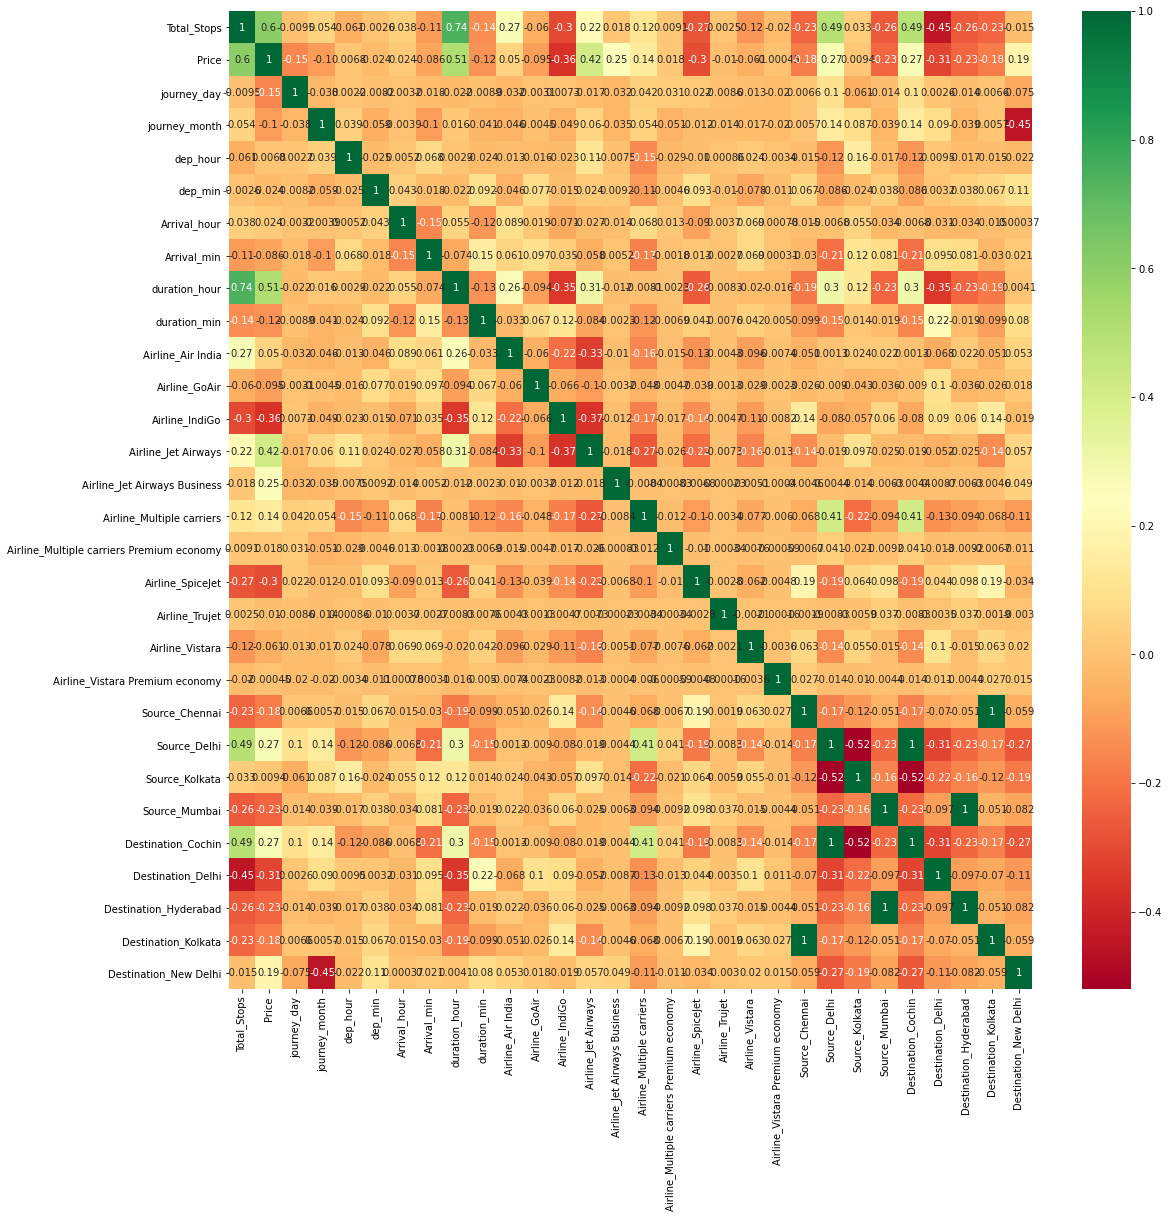

In [77]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn");

In [78]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor()
reg.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [79]:
reg.feature_importances_

array([2.13587303e-01, 1.43275786e-01, 5.40399603e-02, 2.46126954e-02,
       2.09931639e-02, 2.81984201e-02, 1.91528595e-02, 1.23786130e-01,
       1.76806706e-02, 1.09211867e-02, 2.04977028e-03, 1.96265774e-02,
       1.41893074e-01, 6.80704867e-02, 1.61977759e-02, 8.55189096e-04,
       3.61207129e-03, 1.23768452e-04, 4.97763662e-03, 8.89717258e-05,
       5.40422054e-04, 1.46957083e-02, 3.27696328e-03, 7.72084683e-03,
       1.10740447e-02, 1.65097500e-02, 6.97462120e-03, 4.94934852e-04,
       2.49692116e-02])

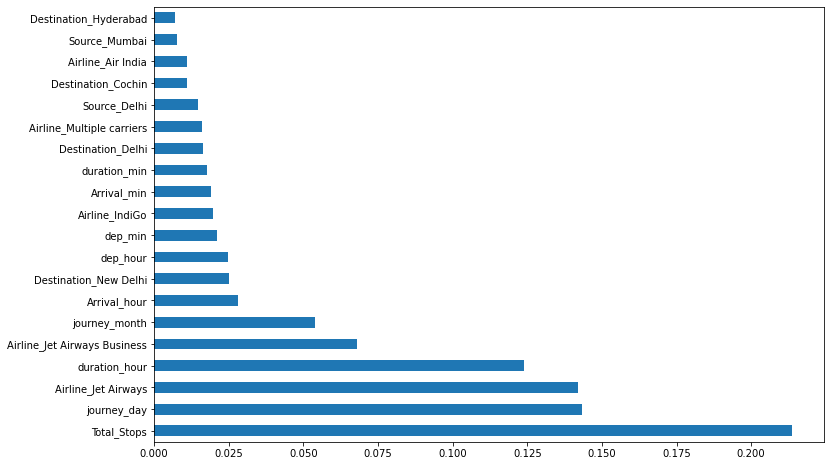

In [80]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting Random Forest

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [82]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [83]:
y_pred = reg_rf.predict(X_test)
reg_rf.score(X_train, y_train)

0.9531430568100662

In [84]:
reg_rf.score(X_test, y_test)

0.7964412104656435

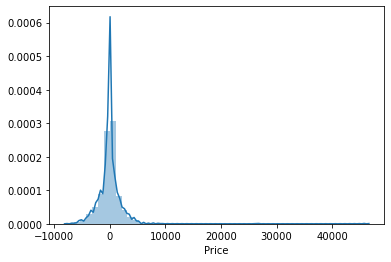

In [86]:
#residual Plot
sns.distplot(y_test-y_pred);

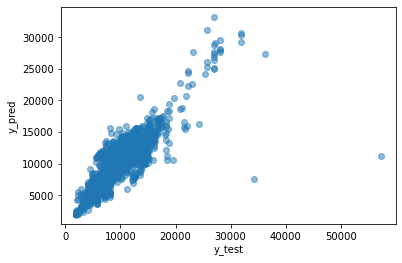

In [87]:
#Actial vs predicted
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [88]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1181.9377670059102
MSE: 4389146.085217986
RMSE: 2095.0288984207323


In [89]:
metrics.r2_score(y_test, y_pred)

0.7964412104656436

# Hyperparameter Tuning

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [91]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 90, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num = 4)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [92]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [93]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [94]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1099, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1099, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15, total=  19.1s
[CV] n_estimators=1099, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.0s remaining:    0.0s


[CV]  n_estimators=1099, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15, total=  19.7s
[CV] n_estimators=1099, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=1099, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15, total=  19.0s
[CV] n_estimators=1099, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=1099, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15, total=  18.9s
[CV] n_estimators=1099, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=1099, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15, total=  19.9s
[CV] n_estimators=796, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=796, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=  18.2s
[CV] n_estimators=796, min_samples_spl

[CV]  n_estimators=695, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  12.1s
[CV] n_estimators=695, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=695, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  12.1s
[CV] n_estimators=695, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=695, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  12.7s
[CV] n_estimators=695, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=695, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  12.8s
[CV] n_estimators=695, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=695, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  12.5s
[CV] n_estimators=190, min_samples_split=2,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [95]:
rf_random.best_params_

{'n_estimators': 90,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [96]:
prediction = rf_random.predict(X_test)

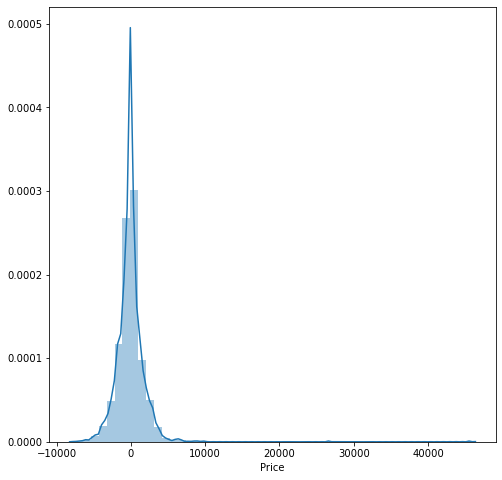

In [98]:
#residual plot
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction);

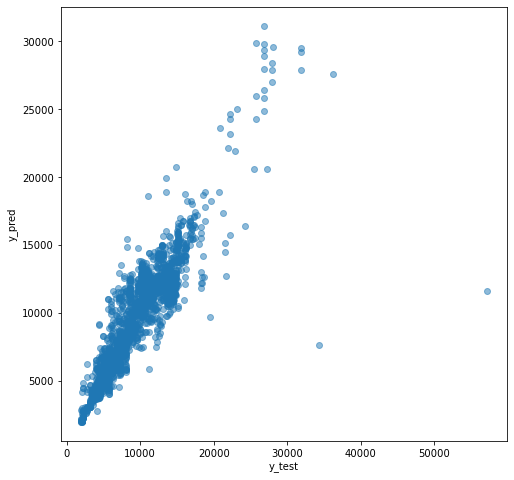

In [99]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [100]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1158.5276284232116
MSE: 4024400.3451079847
RMSE: 2006.0908117799615


# Saving the model

In [102]:
import pickle

file = open('flight_rf.pkl', 'wb')
pickle.dump(rf_random,file)

In [104]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [105]:
y_prediction = forest.predict(X_test)

In [106]:
metrics.r2_score(y_test, y_prediction)

0.8133573030046135